In [74]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [100]:
def extract_data(data, type):
    if type == "Whole":
        time = data.iloc[:,0]
        Vgs = data.iloc[:,1]
        Vds = data.iloc[:,2]
        Ids = data.iloc[:,3]        
        
        time = time.values.round(64).tolist()
        Vgs = Vgs.values.round(64).tolist()
        Vds = Vds.values.round(64).tolist()
        Ids = Ids.values.round(64).tolist()

    elif type == "1st_off":
        time = data.iloc[:,0]
        Vgs = data.iloc[:,1]
        Vds = data.iloc[:,2]
        Ids = data.iloc[:,3]

        temp_time = time.values.round(64).tolist()
        temp_Vgs = Vgs.values.round(64).tolist()
        temp_Vds = Vds.values.round(64).tolist()
        temp_Ids = Ids.values.round(64).tolist()

        time, Vgs, Vds, Ids = [], [], [], []
        for i in range(len(temp_time)):
            if temp_time[i] >= 0.000075 and temp_time[i] <= 0.000078:
                time.append(temp_time[i])
                Vgs.append(temp_Vgs[i])
                Vds.append(temp_Vds[i])
                Ids.append(temp_Ids[i])

    elif type == "2nd_on":
        time = data.iloc[:,0]
        Vgs = data.iloc[:,1]
        Vds = data.iloc[:,2]
        Ids = data.iloc[:,3]

        temp_time = time.values.round(64).tolist()
        temp_Vgs = Vgs.values.round(64).tolist()
        temp_Vds = Vds.values.round(64).tolist()
        temp_Ids = Ids.values.round(64).tolist()

        time, Vgs, Vds, Ids = [], [], [], []
        for i in range(len(temp_time)):
            if temp_time[i] >= 0.0001245 and temp_time[i] <= 0.0001275:
                time.append(temp_time[i])
                Vgs.append(temp_Vgs[i])
                Vds.append(temp_Vds[i])
                Ids.append(temp_Ids[i])
        
    return time, Vgs, Vds, Ids


def extract_last (x):
     sec = x[(len(x)-1)]
     return sec


def proportional_time(time): # precision from datasheet is not enough, distribute it proportionally (time distance: 8ns in this case)
    transformed = np.linspace(time[0], extract_last(time), len(time))


def aux_or_dut(part):
    if part == "Dut":
        return "a" # a end with ...data
    elif part == "Aux":
        return "2" # 2 end with ...data2


def plot_class(path, part, T, type):
    fig, axs = plt.subplots(ncols=1, nrows=3, constrained_layout=True, figsize=(16, 27))
    axs[0].set_title('1 - Vgs')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Vgs')
    axs[0].set_yticks(np.arange(-20,50,5))
    axs[0].grid(True, linestyle='-.')
    axs[0].tick_params(labelcolor='r', labelsize='medium', width=3)
    axs[1].set_title('2 - Vds')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Vds')
    axs[1].set_yticks(np.arange(-100,800,50))
    axs[1].grid(True, linestyle='-.')
    axs[1].tick_params(labelcolor='r', labelsize='medium', width=3)
    axs[2].set_title('3 - Ids')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Ids')
    axs[2].set_yticks(np.arange(-250,2600,100))
    axs[2].grid(True, linestyle='-.')
    axs[2].tick_params(labelcolor='r', labelsize='medium', width=3)

    for root, dirs, files in os.walk(path):
        feature_matrix = []
        index_name = []

        for name in files:
            path = os.path.join(root, name)

            index = name.rfind("ScopeData")
            print('reading the csv file:', name[index:],'...') 
            
            if name[len(name)-5] == aux_or_dut(part) and T in name:
                print("Bingo!")
                csv_data = pd.read_csv(path, delimiter='\t', header=7)
                time, Vgs, Vds, Ids = extract_data(csv_data, type)
                axs[0].plot(time, Vgs)    
                axs[1].plot(time, Vds)    
                axs[2].plot(time, Ids) 
                index_name.append(name)

                compressed = int(len(time)/5)
                compressed_Vgs, compressed_Vds, compressed_Ids = [], [], []
                for k in range(compressed):
                    if k*5 < len(time)-1:
                        compressed_Vgs.append(Vgs[k*5])
                        compressed_Vds.append(Vds[k*5])
                        compressed_Ids.append(Ids[k*5])
                compressed_module = compressed_Vgs + compressed_Vds + compressed_Ids    
                feature_matrix.append(compressed_module)
    dataset = pd.DataFrame(feature_matrix, index=index_name)
    plt.show()
    return dataset

def plot_sub_class(path, part, T, type, module_name):
    fig, axs = plt.subplots(ncols=1, nrows=3, constrained_layout=True, figsize=(16, 27))
    axs[0].set_title('1 - Vgs')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Vgs')
    axs[0].set_yticks(np.arange(-20,50,5))
    axs[0].grid(True, linestyle='-.')
    axs[0].tick_params(labelcolor='r', labelsize='medium', width=3)
    axs[1].set_title('2 - Vds')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Vds')
    axs[1].set_yticks(np.arange(-100,800,50))
    axs[1].grid(True, linestyle='-.')
    axs[1].tick_params(labelcolor='r', labelsize='medium', width=3)
    axs[2].set_title('3 - Ids')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Ids')
    axs[2].set_yticks(np.arange(-250,2600,100))
    axs[2].grid(True, linestyle='-.')
    axs[2].tick_params(labelcolor='r', labelsize='medium', width=3)

    for root, dirs, files in os.walk(path):
        feature_matrix = []
        index_name = []

        for name in files:
            path = os.path.join(root, name)

            index = name.rfind("ScopeData")
            #print('reading the csv file:', name[index:],'...') 
            
            if name[len(name)-5] == aux_or_dut(part) and T in name and name in module_name:
                #print("Bingo!")
                csv_data = pd.read_csv(path, delimiter='\t', header=7) #把csv读取放在判断里可以加快速度
                time, Vgs, Vds, Ids = extract_data(csv_data, type)
                axs[0].plot(time, Vgs)    
                axs[1].plot(time, Vds)    
                axs[2].plot(time, Ids) 
    plt.show()



reading the csv file: ScopeData.csv ...
reading the csv file: ScopeData2.csv ...
reading the csv file: ScopeData.csv ...
reading the csv file: ScopeData2.csv ...
reading the csv file: ScopeData.csv ...
reading the csv file: ScopeData2.csv ...
reading the csv file: ScopeData.csv ...
reading the csv file: ScopeData2.csv ...
reading the csv file: ScopeData.csv ...
reading the csv file: ScopeData2.csv ...
reading the csv file: ScopeData.csv ...
reading the csv file: ScopeData2.csv ...
reading the csv file: ScopeData.csv ...
reading the csv file: ScopeData2.csv ...
reading the csv file: ScopeData.csv ...
reading the csv file: ScopeData2.csv ...
reading the csv file: ScopeData.csv ...
reading the csv file: ScopeData2.csv ...
reading the csv file: ScopeData.csv ...
reading the csv file: ScopeData2.csv ...
reading the csv file: ScopeData.csv ...
reading the csv file: ScopeData2.csv ...
reading the csv file: ScopeData.csv ...
reading the csv file: ScopeData2.csv ...
reading the csv file: ScopeD

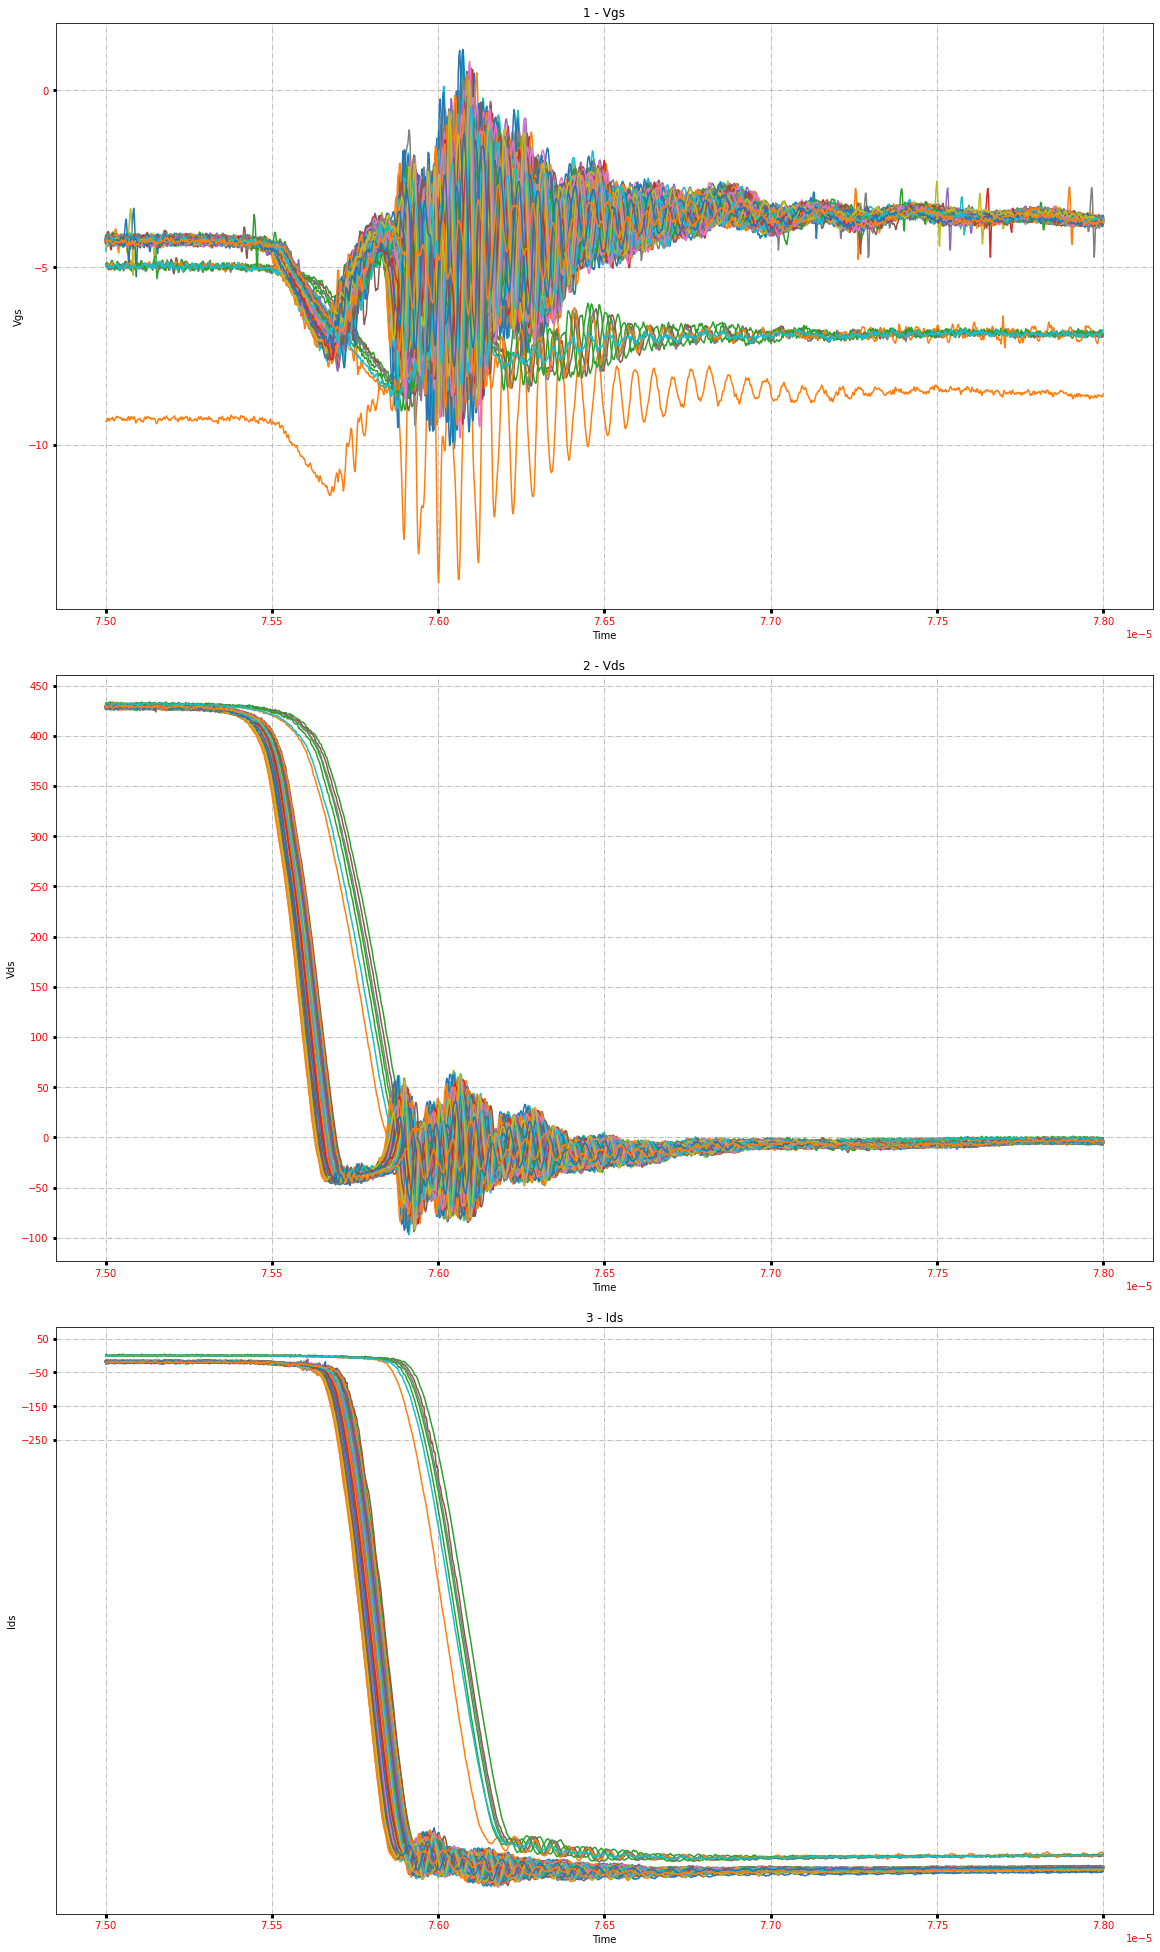

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
ScopeData_135L0636_155020540_T2_100_2126_0_1_DNB_ScopeData2.csv,-4.20,-4.17,-4.22,-4.22,-4.23,-4.220000,-4.300000,-4.27,-3.81,-4.820000,...,-1517.7,-1517.7,-1517.1,-1515.3,-1516.2,-1515.9,-1514.7,-1515.9,-1515.6,-1516.8
ScopeData_135L0636_155020540_T2_100_2184_1_1_DNB_ScopeData2.csv,-4.11,-4.23,-4.18,-4.19,-4.34,-4.280000,-4.250000,-4.21,-4.28,-4.240000,...,-1515.0,-1514.4,-1514.7,-1514.1,-1516.5,-1515.6,-1513.2,-1515.6,-1515.3,-1513.5
ScopeData_135L0636_155020540_T2_100_54_0_1_DNB_ScopeData2.csv,-4.91,-4.91,-4.99,-4.96,-4.90,-4.980000,-4.880000,-4.99,-4.94,-4.910000,...,-1478.7,-1479.6,-1479.9,-1477.5,-1479.9,-1477.8,-1478.1,-1477.5,-1478.1,-1476.9
ScopeData_135L0636_155020540_T2_101_2127_0_1_DNB_ScopeData2.csv,-4.19,-4.25,-4.32,-4.24,-4.30,-4.180000,-4.230000,-4.25,-4.17,-4.289999,...,-1514.7,-1514.1,-1515.6,-1513.2,-1514.4,-1513.8,-1513.8,-1514.1,-1515.0,-1515.9
ScopeData_135L0636_155020540_T2_102_2128_0_1_DNB_ScopeData2.csv,-4.21,-4.25,-4.30,-4.25,-4.30,-4.289999,-4.289999,-4.22,-4.19,-4.200000,...,-1516.8,-1516.8,-1515.9,-1515.3,-1515.9,-1515.3,-1514.1,-1516.5,-1516.5,-1513.8


In [72]:
path = "//danfoss.net/files/DDS/DEDDS-MCH/Teams/Modules/EOLData/RivianTest/155020540"
# -----------------------------------------------------------
part = "Aux" 
# "Aux" or "Dut"
# -----------------------------------------------------------
T = "T2" 
# "T1" or "T2"
# -----------------------------------------------------------
type = "1st_off" 
# "Whole" or "1st_off" or "2nd_on"
# -----------------------------------------------------------
dataset = plot_class(path, part, T, type)
dataset.head()

In [139]:
model=IsolationForest(contamination=float(0.027)) # need to tune contamination, smaller - fewer number
model.fit(dataset)

dataset['scores'] = model.decision_function(dataset)
dataset['anomaly'] = model.predict(dataset)

labels = dataset['anomaly'].tolist()
ind = dataset.index.tolist()
H, A = [], []
for n in range(len(labels)):
    if labels[n] == -1:
        A.append(ind[n])
    elif labels[n] == 1:
        H.append(ind[n])
dataset.head()

print("Number of bad modules:", len(A))

Number of bad modules: 8


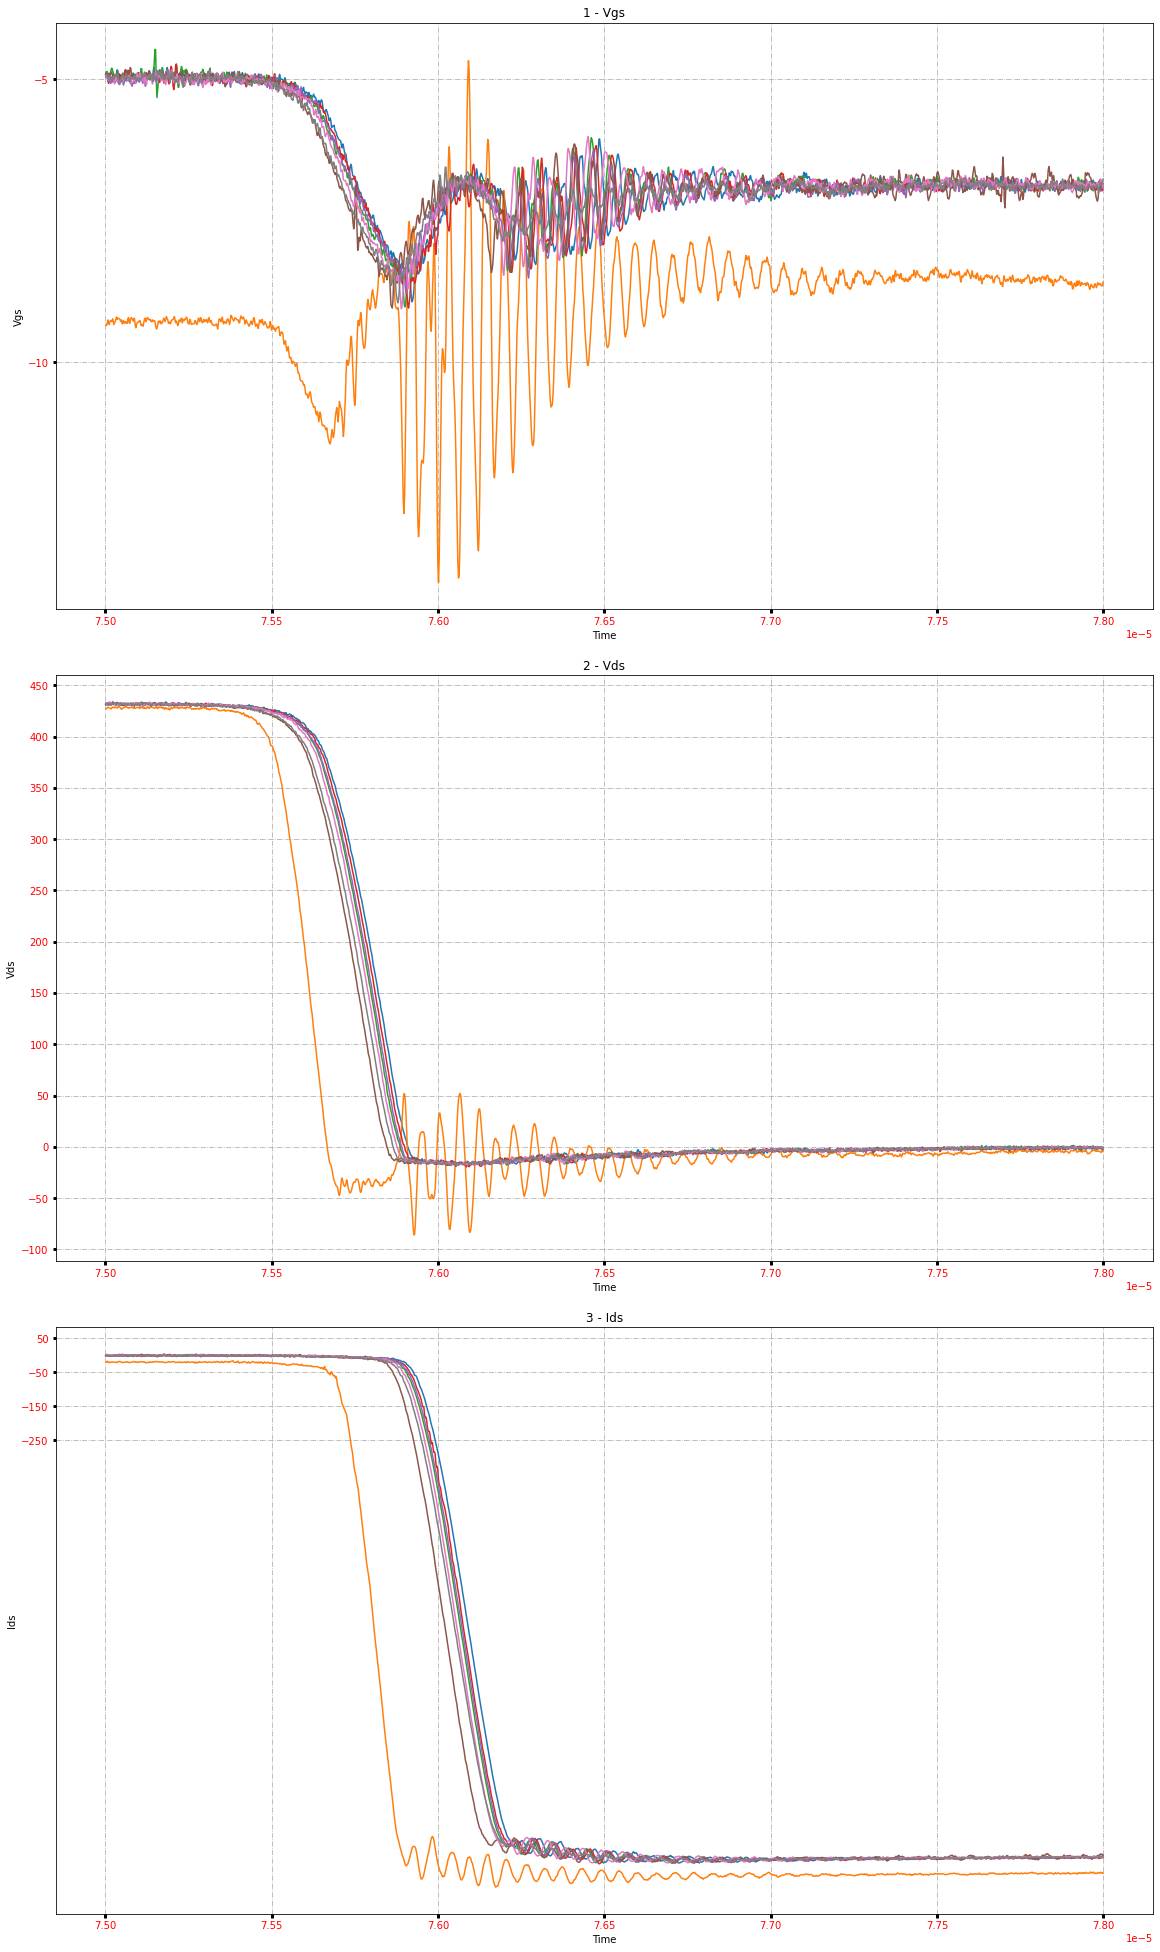

In [137]:
module_name = A
plot_sub_class(path, part, T, type, module_name)

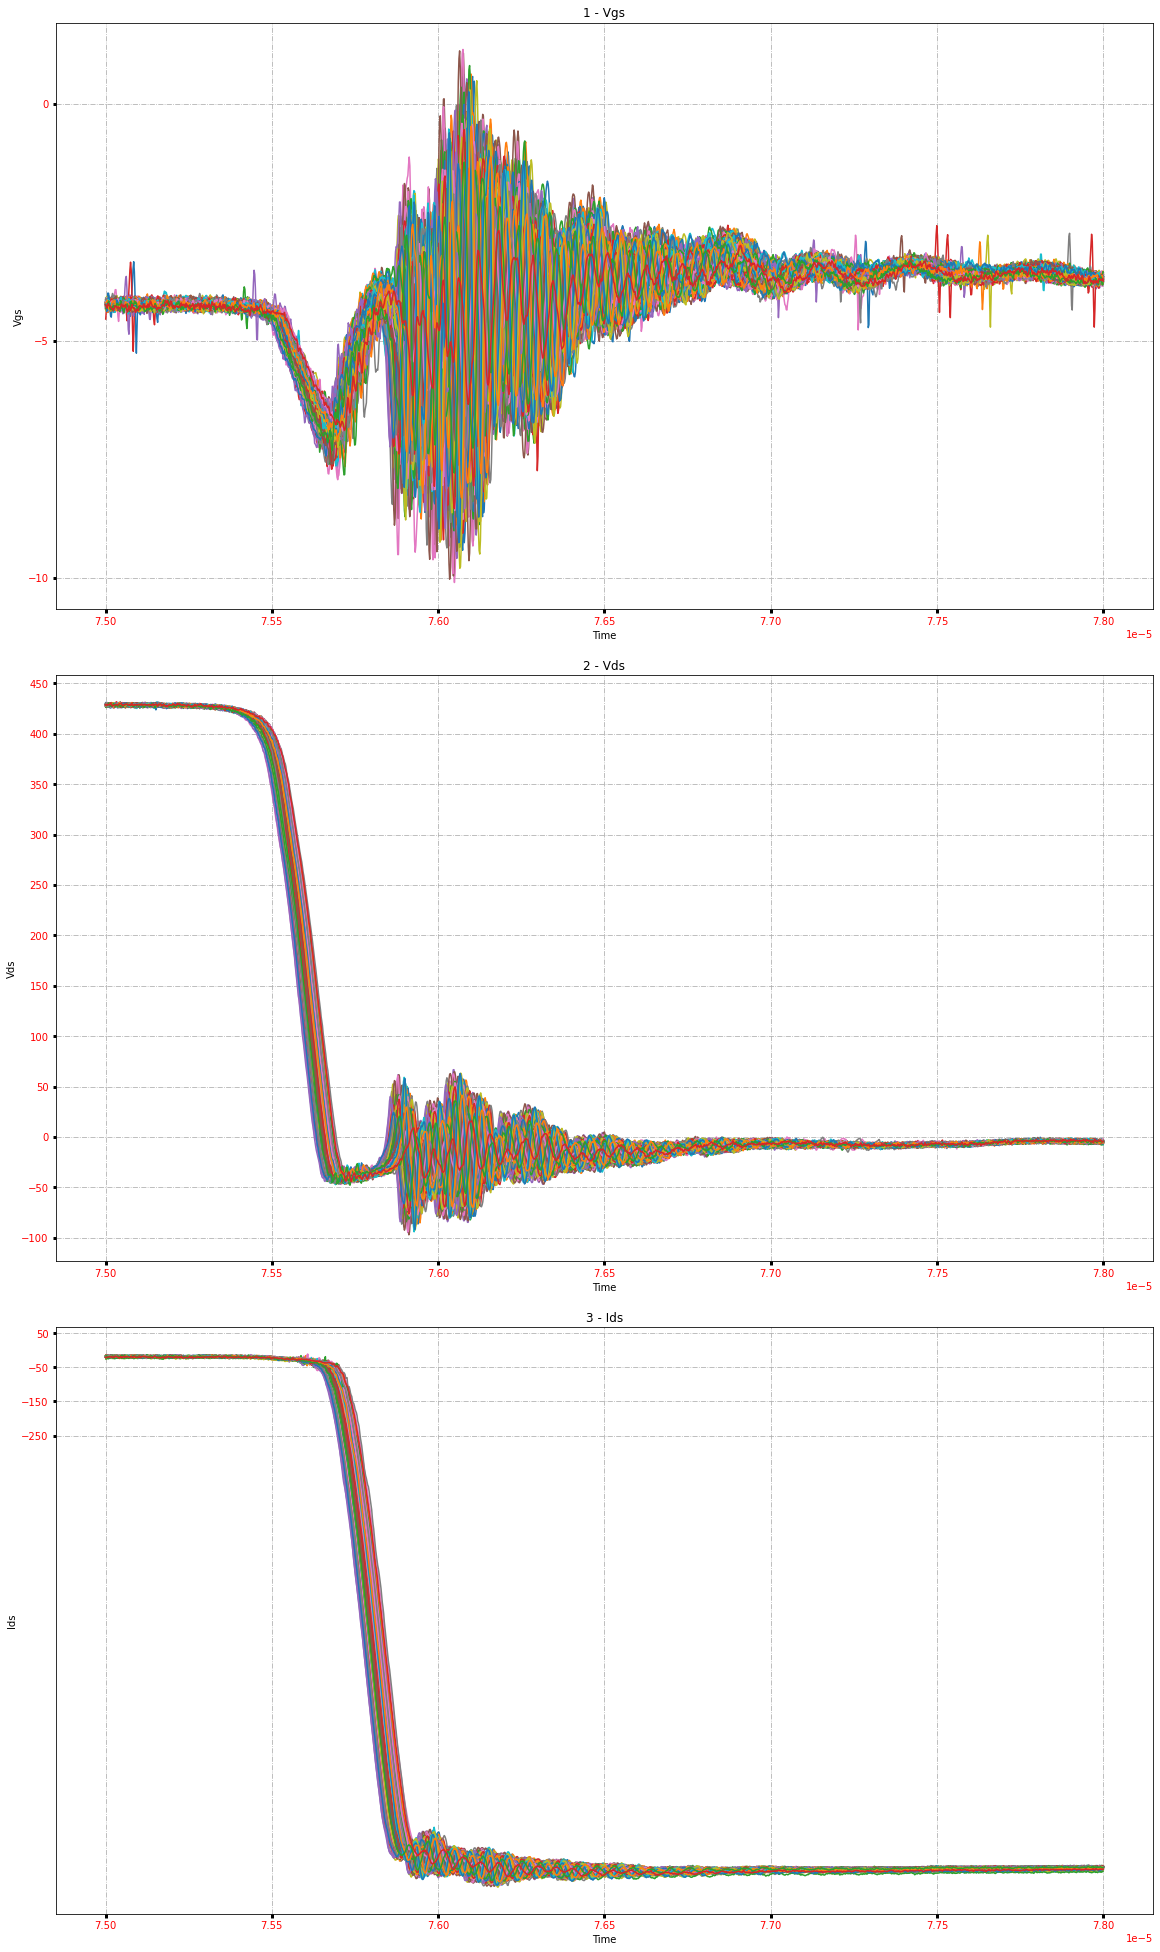

In [138]:
module_name = H
plot_sub_class(path, part, T, type, module_name)

In [145]:
def plot_sub2_class(path, part, T, type, module_name):
    fig, axs = plt.subplots(ncols=1, nrows=3, constrained_layout=True, figsize=(16, 27))
    axs[0].set_title('1 - Vgs')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Vgs')
    axs[0].set_yticks(np.arange(-20,50,5))
    axs[0].grid(True, linestyle='-.')
    axs[0].tick_params(labelcolor='r', labelsize='medium', width=3)
    axs[1].set_title('2 - Vds')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Vds')
    axs[1].set_yticks(np.arange(-100,800,50))
    axs[1].grid(True, linestyle='-.')
    axs[1].tick_params(labelcolor='r', labelsize='medium', width=3)
    axs[2].set_title('3 - Ids')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Ids')
    axs[2].set_yticks(np.arange(-250,2600,100))
    axs[2].grid(True, linestyle='-.')
    axs[2].tick_params(labelcolor='r', labelsize='medium', width=3)

    for root, dirs, files in os.walk(path):
        feature_matrix = []
        index_name = []
        legends = []

        for name in files:
            path = os.path.join(root, name)

            index = name.rfind("ScopeData")
            index2 = name.rfind(T)
            #print('reading the csv file:', name[index:],'...') 
            
            if name[len(name)-5] == aux_or_dut(part) and T in name and name in module_name:
                #print("Bingo!")
                csv_data = pd.read_csv(path, delimiter='\t', header=7) #把csv读取放在判断里可以加快速度
                time, Vgs, Vds, Ids = extract_data(csv_data, type)
                axs[0].plot(time, Vgs)
                axs[1].plot(time, Vds)
                axs[2].plot(time, Ids) 
                legends.append(name[index2:])
        axs[0].legend(legends) 
        axs[1].legend(legends)
        axs[2].legend(legends)

    plt.show()

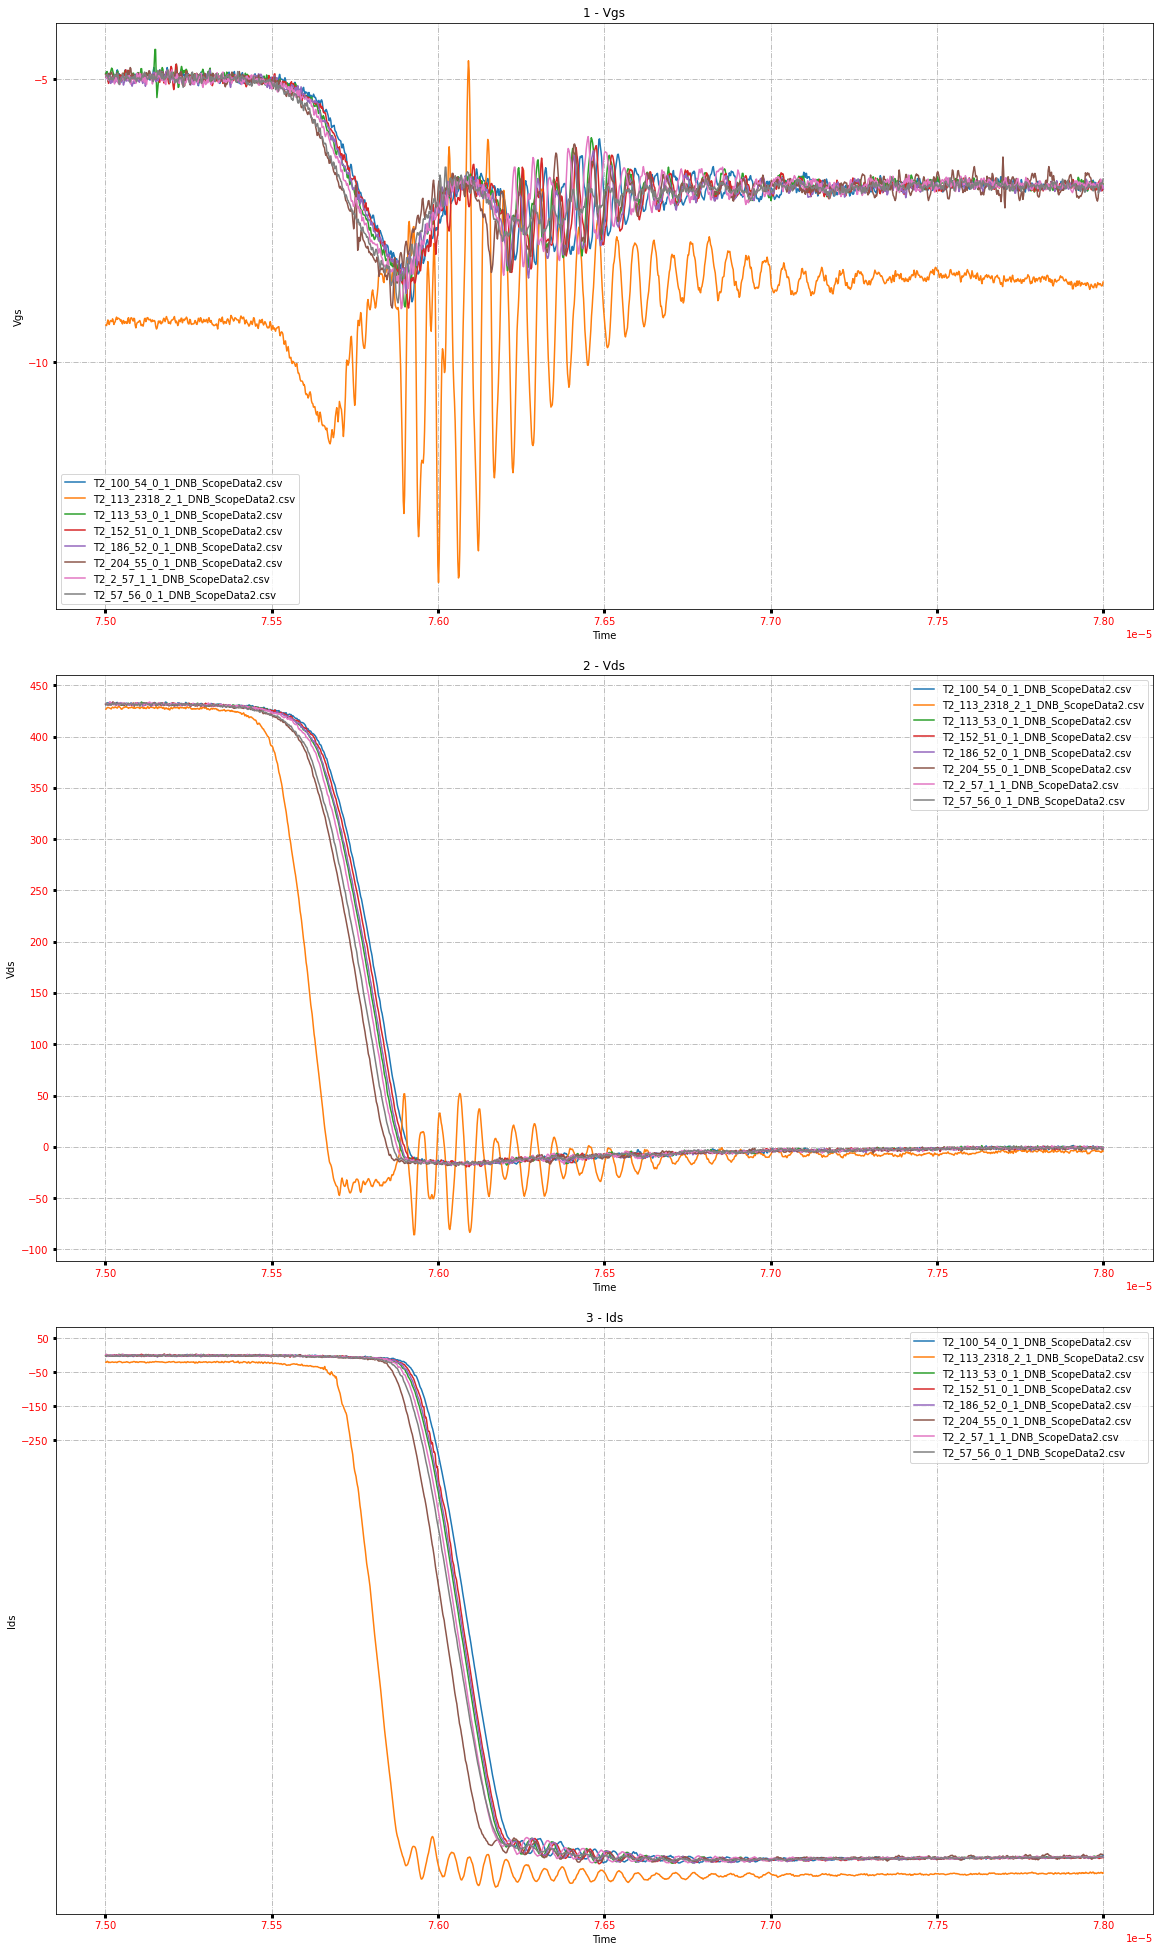

In [146]:
module_name = A
plot_sub2_class(path, part, T, type, module_name)

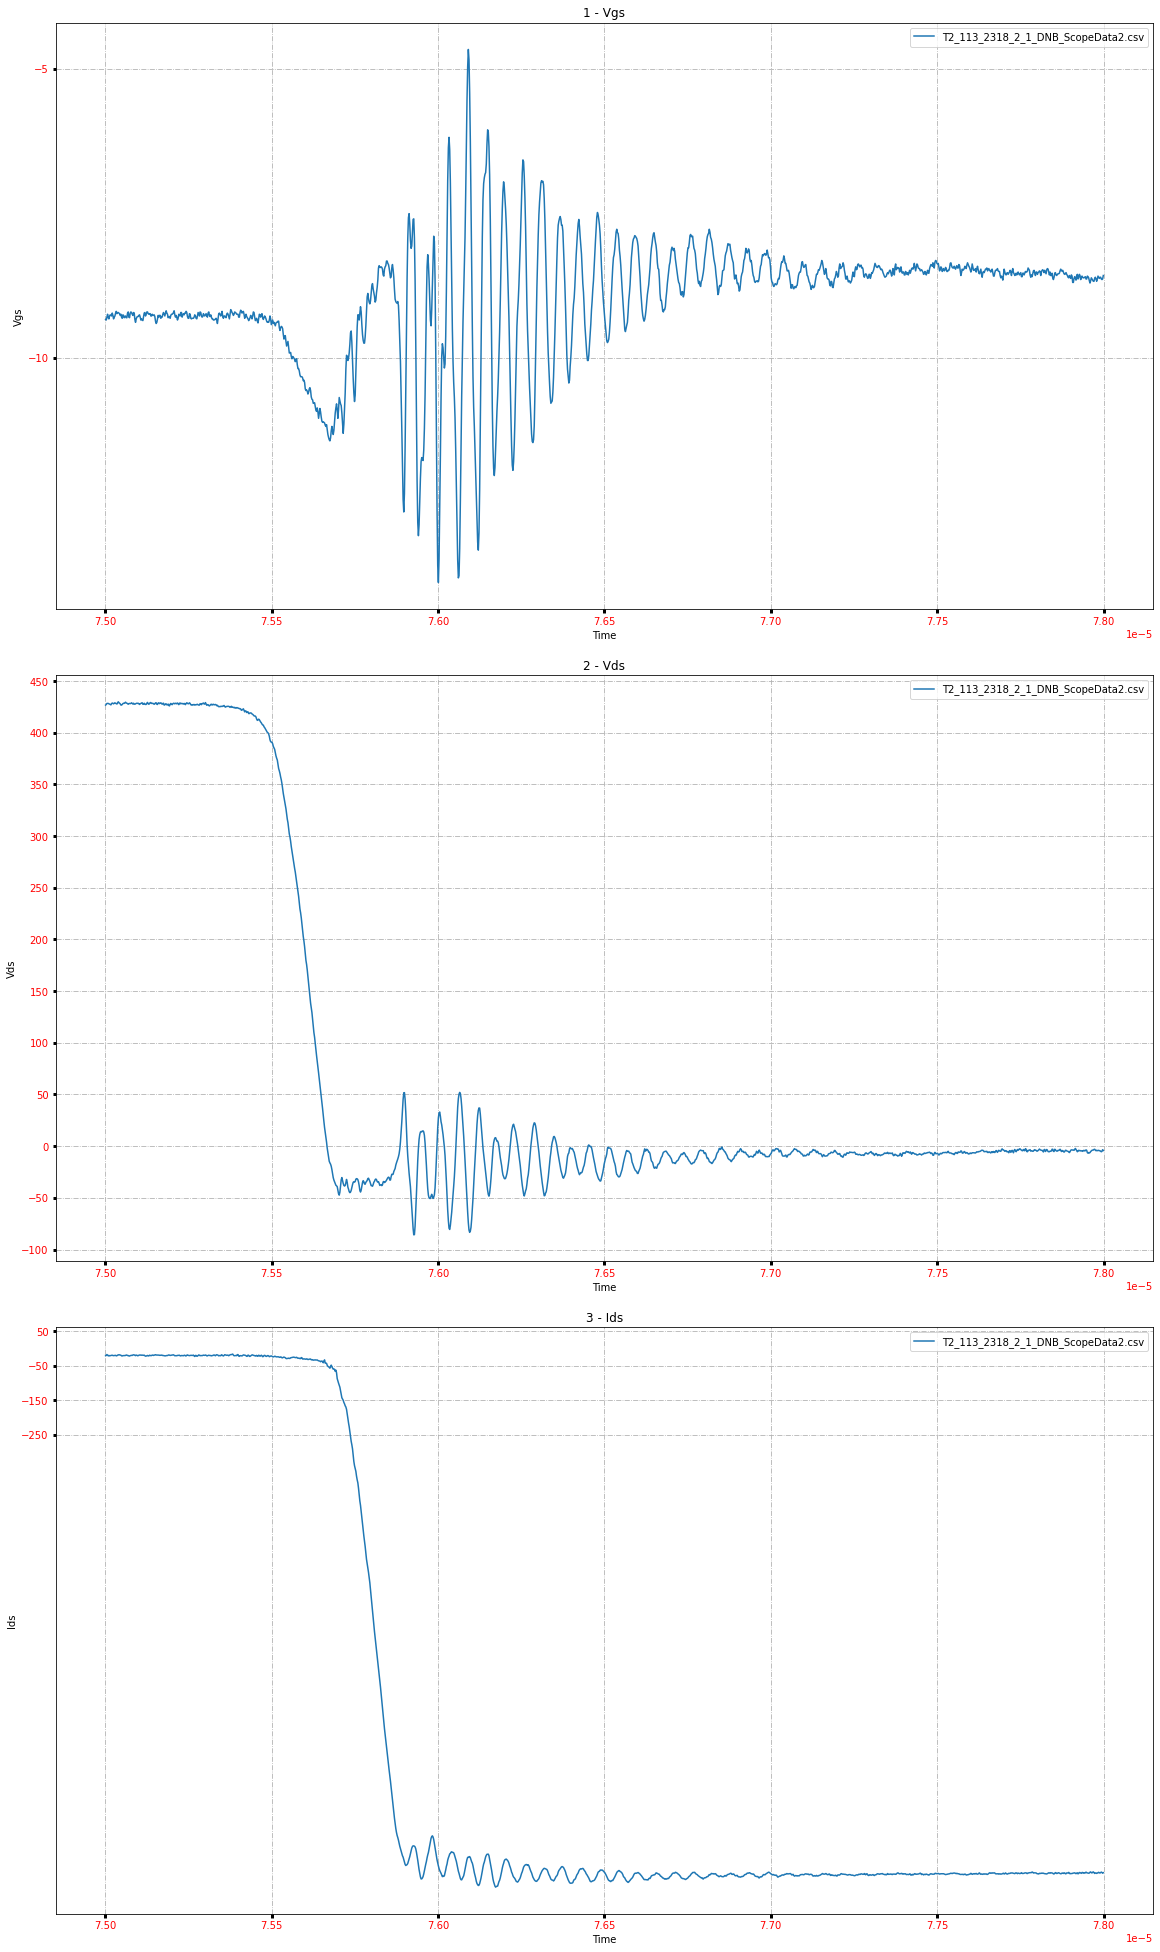

In [149]:
test_data = "C:/Users/u388316/OneDrive - Danfoss/Desktop/test"

plot_sub2_class(test_data, part, T, type, module_name)